In [897]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('seaborn-darkgrid')

In [898]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [899]:
print(data.shape)
print(data.info())
print("Duplicates: " , data.duplicated().sum())

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Duplicates:  0


In [900]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [901]:
data.drop(['Id'], axis=1, inplace=True)

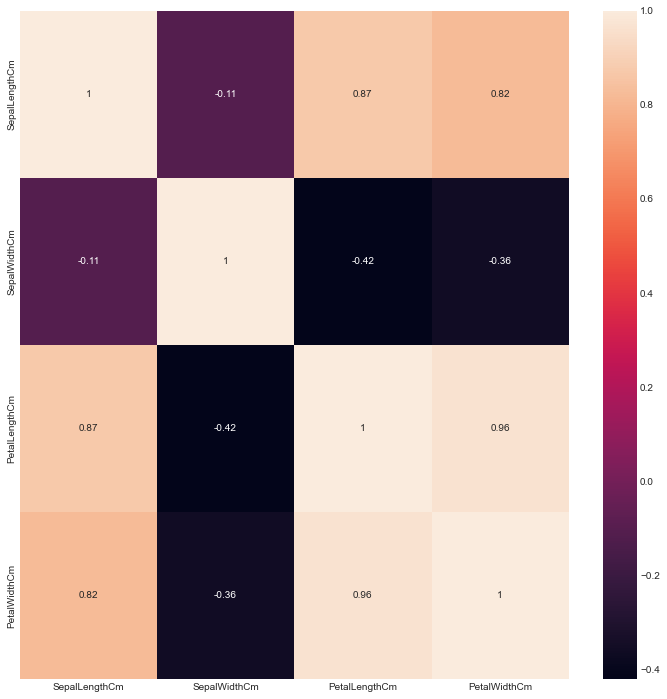

In [902]:
corr = data.corr()
plt.figure(figsize=(12.3,12.3))
sns.heatmap(corr,annot=True)
plt.show()

#### from the correlation map we can see that SepalWidth has weak correlation, so we'll remove it and test our model.

In [903]:
data.drop(['SepalWidthCm'], axis=1, inplace=True)

C:\Users\youse\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


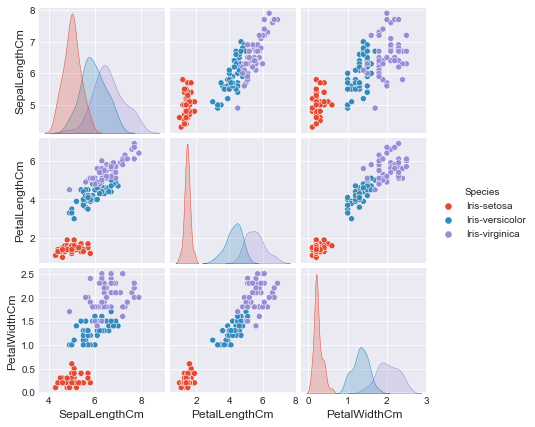

In [915]:
sns.pairplot(hue='Species',data=data, size=2)

#### From the visualization we can see that Iris-setosa's measurments are seperated alone, unlike Iris-versicolor and Iris-virginica which are smilier in measurments.



In [905]:
x = data.drop(['Species'], axis=1)
y = data['Species']

In [906]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [907]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [908]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [909]:
pred = rfc.predict(x_test)

In [910]:
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

1.0
1.0


In [911]:
confusion_matrix(y_test, pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [912]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [913]:
cv_scores = cross_val_score(rfc,x_test,y_test,cv=6)
print(cv_scores.mean())

0.9333333333333332
